

# Titanic with KNN

## Defining the Question

### a) Specifying the Question


Task is to build a model  that will predict people who were likely to survive. 

### b) Defining the Metric for Success

This project will be success if we will be able draw insights from the given datasets, also we will be able to answer the question required and create a workable model.

### c) Understanding the context

Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

Dataset that we will use in this project is titanic dataset with (train and test) bellow are features in the datasets.

- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare (British pound)
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### d) Recording the Experimental Design

The project was undertaken using the following design Datasets(real estate dataset)

Load dataset

Data Cleaning

Performing Exploratory Analysis

Feature Engineering

Algorithm to be used:
 - K-nearest neighbor classifier


Challenging the solution

Conclusion

### e) Data Relevance

The relavance of our data will be answered by the following questions.

Did we get correct insights?

How accurate is the data at predicting the price?

Was the dataset sufficient?

## Reading the Data

In [3]:
# Import libraries
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings(action = 'ignore')


In [4]:
# Load train dataset
# 
tita_train=pd.read_csv('/content/drive/MyDrive/Moringa/Core_Week_9/train.csv')
tita_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Understanding the variable in both dataset
# Survived - Survival (0 = No; 1 = Yes)
# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - Name
# Sex - Sex
# Age - Age
# SibSp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
# Ticket - Ticket Number
# Fare - Passenger Fare (British pound)
# Cabin - Cabin
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [65]:
# load test dataset
tita_test1=pd.read_csv('/content/drive/MyDrive/Moringa/Core_Week_9/test.csv')
tita_test1.head()
tita_test=tita_test1

In [7]:
# data information
tita_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking the Data

In [8]:
# Determining the no. of records in our dataset in dataset
#
# Dataset has 891 rows and 12 columns 

tita_train.shape

(891, 12)

In [9]:
# Previewing the top details of real estate of our dataset
#
tita_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Previewing the last details of real estate of our dataset
#
tita_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
# Checking whether each column has an appropriate datatype
#
tita_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Tidying the Dataset

***Train cleaning***

In [12]:
# Changing all column names to lower case
#
tita_train.columns = tita_train.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
tita_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [13]:
# checking for duplicates
tita_train.duplicated().sum()

0

In [14]:
# Identify if there Missing Data
#
tita_train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

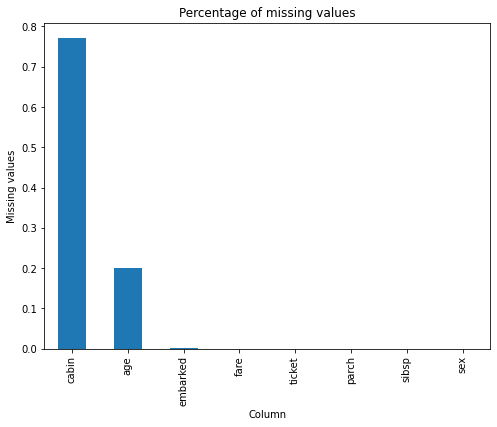

In [15]:
# Visualising missing values
#
tita_train.isna().mean().round(3).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6))
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

From the above results we will drop cabin column because it has more than 70% of null values

In [16]:
# drop cabin column and other irrelevant columns
tita_train.drop(['passengerid','name','ticket','cabin','embarked','fare'],axis=1,inplace=True)
tita_train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch'], dtype='object')

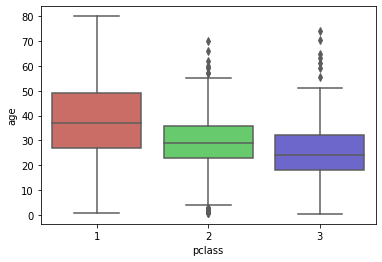

In [17]:
# Imputing missing values
# Checking how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='pclass', y='age', data=tita_train, palette='hls')

From the above plot we can make assumption that young people are in 3rd class and older people are in 1st class.

So we will imput the missing base on their boat classes those in  class 1 we will imput with 38,class 2=29 and class 3=25.

In [18]:
# find age average for all the class
class_1=tita_train.loc[tita_train['pclass']==1]
print('Class 1 age mean',class_1['age'].mean())
class_2=tita_train.loc[tita_train['pclass']==2]
print('Class 2 age mean',class_2['age'].mean())
class_3=tita_train.loc[tita_train['pclass']==3]
print('Class 3 age mean',class_3['age'].mean())

Class 1 age mean 38.233440860215055
Class 2 age mean 29.87763005780347
Class 3 age mean 25.14061971830986


In [19]:
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_posible(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

tita_train['age'] = tita_train[['age', 'pclass']].apply(age_posible, axis=1)
tita_train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
dtype: int64

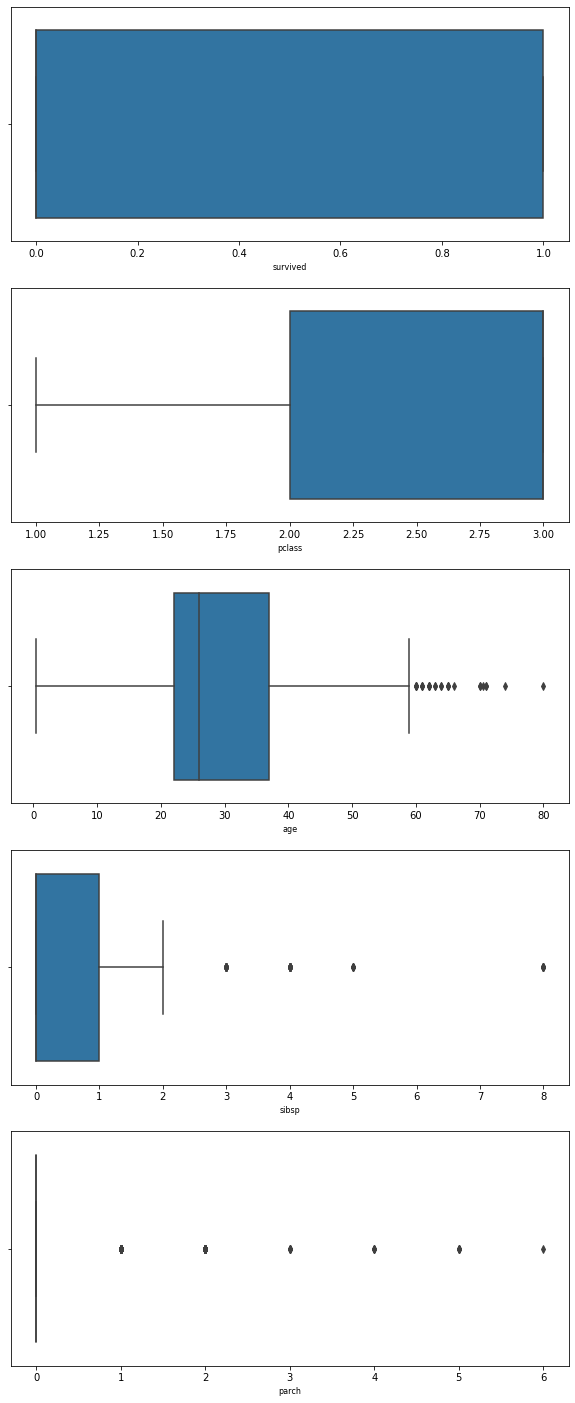

In [20]:
# Checking for outliers.
columns = ['survived', 'pclass', 'age', 'sibsp', 'parch']
fig, ax = plt.subplots(len(columns), figsize= (10,25))
for i, col_val in enumerate(columns):
  sns.boxplot(x = tita_train[col_val], ax= ax[i])
  #ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [21]:
tita_train

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,25.0,1,2
889,1,1,male,26.0,0,0


**Test cleaning**

In [22]:
tita_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
# Changing all column names to lower case
#
tita_test.columns = tita_test.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
tita_test.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [24]:
# checking for duplicates
tita_test.duplicated().sum()

0

In [25]:
# checking for null values
tita_test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

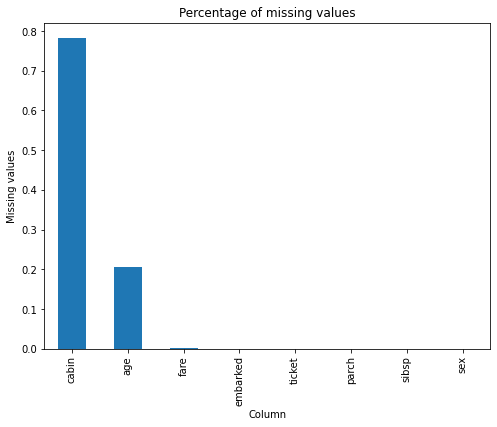

In [26]:
# Visualising missing values
#
tita_test.isna().mean().round(3).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6))
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [27]:
# drop cabin column and other irrelevant columns
tita_test.drop(['passengerid','name','ticket','cabin','fare', 'embarked'],axis=1,inplace=True)
tita_test.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch'], dtype='object')

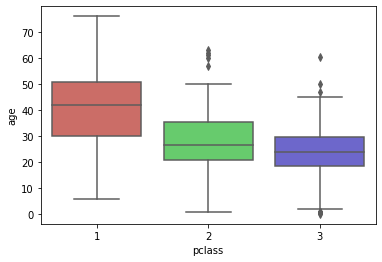

In [28]:
# Imputing missing values
# Checking how passenger age is related to their class as a passenger on the boat.
# 
sns.boxplot(x='pclass', y='age', data=tita_test, palette='hls')

In [29]:
# find age average for all the class
class_1=tita_test.loc[tita_test['pclass']==1]
print('Class 1 age mean',class_1['age'].mean())
class_2=tita_test.loc[tita_test['pclass']==2]
print('Class 2 age mean',class_2['age'].mean())
class_3=tita_test.loc[tita_test['pclass']==3]
print('Class 3 age mean',class_3['age'].mean())

Class 1 age mean 40.91836734693877
Class 2 age mean 28.7775
Class 3 age mean 24.02794520547945


We will impute age for those who are in class 1 will impute wit 40 years and those in class 2 = 28 and those in class 3=24

In [30]:
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_test(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

tita_test['age'] = tita_test[['age', 'pclass']].apply(age_test, axis=1)
tita_test.isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
dtype: int64

## Exploratory Analysis

In [31]:
tita_train.head(2)

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


#### Univariate Analysis

In [32]:
# age mean
tita_train['age'].mean()

29.21904601571268

In [33]:
# age mode
tita_train['age'].mode()

0    25.0
dtype: float64

In [34]:
# age median
tita_train['age'].median()

26.0

In [35]:
# age variance
tita_train['age'].var()

173.99872279675654

In [36]:
# age skew
# positive skewed means right skewness
tita_train['age'].skew()

0.5243725238414554

In [37]:
# age kurtosis 
# it is Platykurtic, Tails of such distributions thinner. 
tita_train['age'].kurt()

0.8177548244139081

In [38]:
# discribe data to get mean, mode,min,max
tita_train.describe()


,survived,pclass,age,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.219046,0.523008,0.381594
std,0.486592,0.836071,13.190858,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


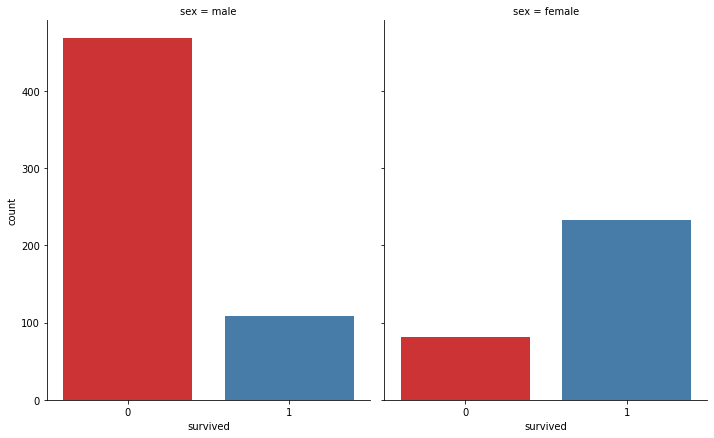

In [39]:
# Plotting bar charts
#
sns.catplot("survived", col="sex", col_wrap=4, data=tita_train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

We can see that many male died as compared to female also many women survived less died as compared to male.

In [40]:
df = tita_train.groupby(['survived', 'sex']).size().reset_index()
df['percentage'] = tita_train.groupby(['survived', 'sex']).size().groupby(level=1).apply(lambda x: 100 * x / float(x.sum())).values
df.columns = ['survived', 'sex', 'counts', 'percentage']
df

,survived,sex,counts,percentage
0,0,female,81,25.796178
1,0,male,468,81.109185
2,1,female,233,74.203822
3,1,male,109,18.890815


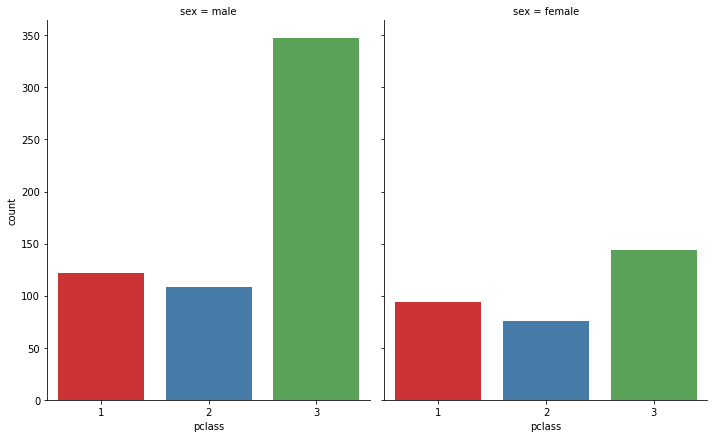

In [41]:
# bar chart 
sns.catplot("pclass", col="sex", col_wrap=4, data=tita_train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

Many male were in class 3 and less in class 2 while more female wer in class 3 and less in class 2.

Text(0.5, 1.0, 'Passenger class vs all the features')

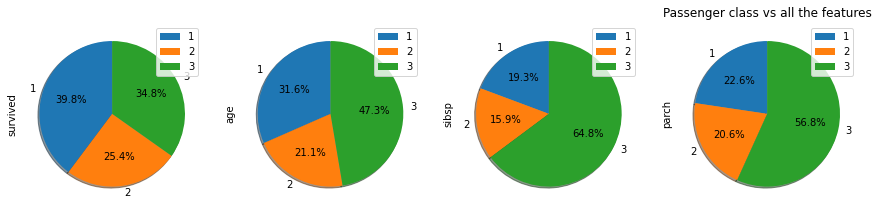

In [42]:
# pie chart
tita_train.groupby(['pclass']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title('Passenger class vs all the features')


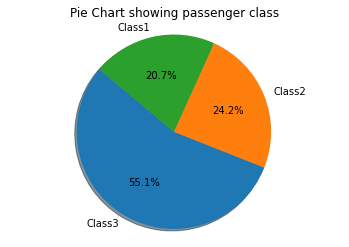

In [43]:
# Pie chart for Class 
num = tita_train['pclass'].value_counts()
num
names = ['Class3','Class2','Class1'] 
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing passenger class')
plt.show()

#### Bivariate Analysis

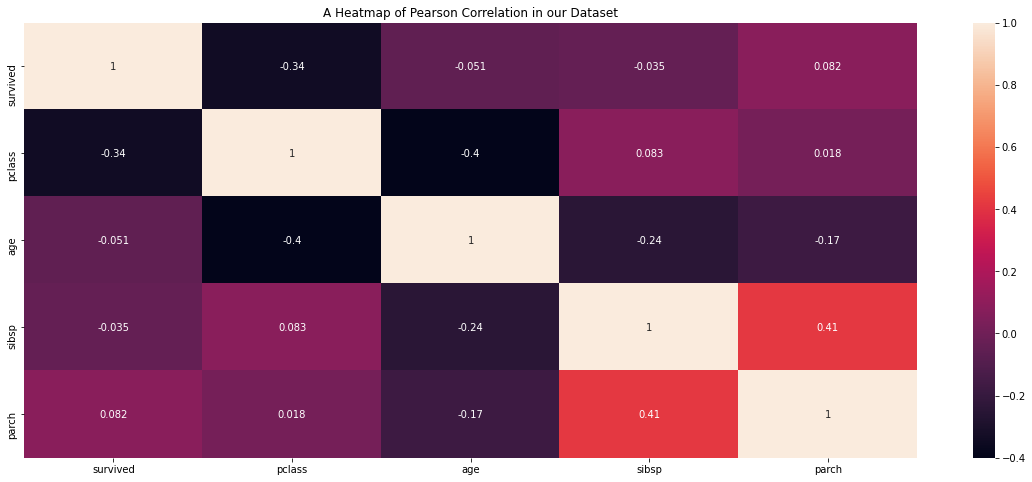

In [44]:
# Plot heatmap
# 
a = tita_train.corr() 
plt.figure(figsize = (20,8))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset')
plt.show()


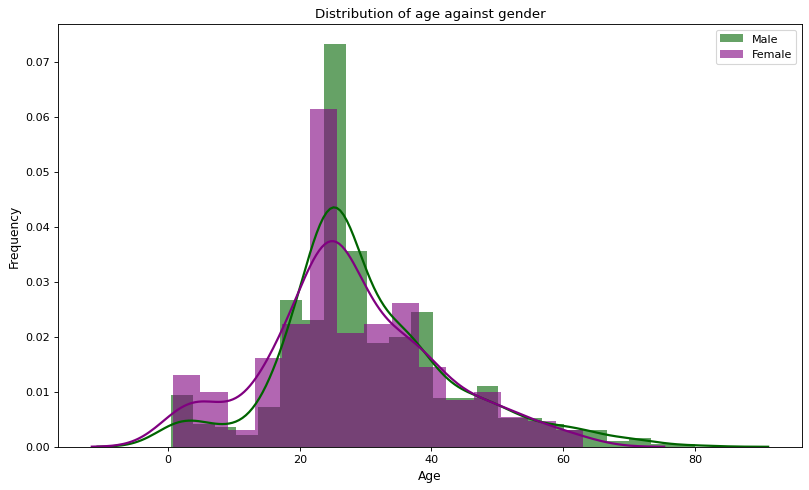

In [45]:
# Distribution of age against gender
# Plotting histogram to show distribution of age per gender
# 

# Selecting only male datapoints in the age column
male = tita_train.loc[tita_train.sex=='male', 'age']  
# Selecting only female datapoints in the age column
female = tita_train.loc[tita_train.sex=='female', 'age']  

# Creating a dictionary containing opacaticy and line width
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="purple", label="Female", **kwargs)
plt.title('Distribution of age against gender', fontsize = 12)
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.legend()

The above chart shows that most of the people were between the age of 20 to 40


<Figure size 480x320 with 0 Axes>

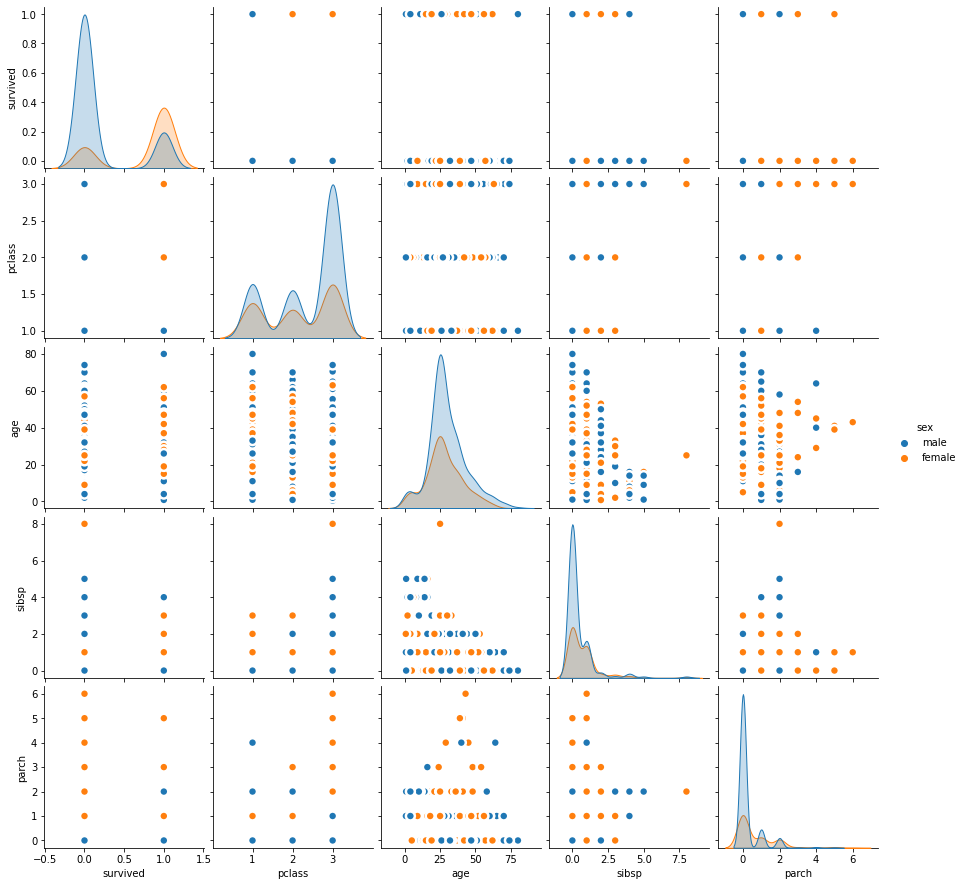

In [46]:
# Pairplot for all the numerical values
plt.figure(dpi= 80)
sns.pairplot(tita_train[['sex','survived','pclass','age','sibsp','parch']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [47]:
# Reduction using LDA

X=tita_train.drop(['survived'],1)
y=tita_train.survived

X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Implementing the Solution

### Feature Engineering

In [48]:
# Changing categorical columns in train dataset using label encoding
train=tita_train
categorical_cols = ['sex'] 

from sklearn.preprocessing import LabelEncoder,StandardScaler
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))  
train.head()


,survived,pclass,sex,age,sibsp,parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [49]:
train

,survived,pclass,sex,age,sibsp,parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,25.0,1,2
889,1,1,1,26.0,0,0


In [50]:
tita_test

,pclass,sex,age,sibsp,parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,25.0,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,25.0,0,0


In [51]:
# Changing categorical columns in test dataset using label encoding
test=tita_test
categorical_cols = ['sex'] 

from sklearn.preprocessing import LabelEncoder,StandardScaler
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
test[categorical_cols] = test[categorical_cols].apply(lambda col: le.fit_transform(col)) 
test.head()

,pclass,sex,age,sibsp,parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1


In [52]:
test

,pclass,sex,age,sibsp,parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,25.0,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,25.0,0,0


### Modelling

#### K-nearest neighbor classifier

**Model 1 split 80-20**

In [53]:
# 
X=train.drop(['survived'],1)
y=train.survived


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Fit the data to the model
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# make predictions on our test data
#
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))


[[99 11]
 [27 42]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       110
           1       0.79      0.61      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.79      0.78       179

The accuracy score is: 0.7877094972067039


The accuracy of the model is 78.8%.

Lets find out if by spliting to 70-30 or 60-40 will improve the model.

**Model 2 split 70-30**

In [69]:
# 
X=train.drop(['survived'],1)
y=train.survived


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

# Fit the data to the model
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# make predictions on our test data
#
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))


[[147  21]
 [ 39  61]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       168
           1       0.74      0.61      0.67       100

    accuracy                           0.78       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.78      0.77       268

The accuracy score is: 0.7761194029850746


The

**Model 3 split 60-40**

In [70]:
# 
X=train.drop(['survived'],1)
y=train.survived


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=0)

# Fit the data to the model
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# make predictions on our test data
#
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))


[[189  32]
 [ 62  74]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       221
           1       0.70      0.54      0.61       136

    accuracy                           0.74       357
   macro avg       0.73      0.70      0.71       357
weighted avg       0.73      0.74      0.73       357

The accuracy score is: 0.7366946778711485


From the above models will apply hyperparameter tuning to model 1 because it has the highest accuracy of 78.8% to find if the model will improve the accuracy.

**Model2 with data reduction method and Hyperparameter Tuning**

In [54]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 26
Best p: 1
Best n_neighbors: 5


In [76]:
X=train.drop(['survived'],1)
y=train.survived


# splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Feature Scaling
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# # Peforming LDA

# lda = LDA(n_components=6)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

# fitting to the model
classifier = KNeighborsClassifier(n_neighbors=5,p=1,leaf_size=26)
model=classifier.fit(X_train, y_train)

# make predictions on our test data
y_pred = model.predict(X_test)

# Check for the metric and accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('The accuracy score is:',accuracy_score(y_test, y_pred))


[[101   9]
 [ 23  46]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

The accuracy score is: 0.8212290502793296


After applying parameters the model performance improve to 82.1% 


**Finds the prediction of test data**

In [62]:

test_pred=model.predict(test)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
predicts = pd.Series(model.predict(test), name='Survived')

In [66]:
PassId = tita_test1['PassengerId']

In [67]:
result = pd.concat([PassId, predicts], axis=1)

In [68]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [ ]:
y.shape

(889,)

In [ ]:
test

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,25.0,0,0,8.0500,0,1,0,0,1


### Challenging the Question

In [78]:
# Reviewing the Solution 
#
# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings(action = 'ignore')


# Declaring our X and y variables
X = train.drop('survived', axis=1)

y = train.survived

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.797613 (0.039965)
LDA: 0.793408 (0.043222)
KNN: 0.747066 (0.042737)
CART: 0.783549 (0.041498)
RF: 0.797653 (0.035628)
GBC: 0.811639 (0.046364)
NB: 0.758431 (0.061439)
SVM: 0.791960 (0.037298)


From the above results Random forest Classifier of an accuracy of 79.8% is better than the other models without applying hyperparameter tuning.

KNN model with parameter tuning is the best model so the model is the best with an accuracy of 82.1%


## Follow up questions

a). Did we have the right data?


We had the right data since we were able to get some insights from it. it also helps in doing a predictive model of deferent algorithms models which gave accuracy

b). Do we need other data to answer our question?

We needed other data to so as to improve the accuracy of the model

c). Did we have the right question?

Yes, Questions were correct since we were able to answer them.

## Conclusion

The model will give us an acuracy of 77.6% which is not bad but other data with more rows is needed so as to improve the accuracy of the model.

Base on the same data Gredient boosting algorithm does well with an accuracy of 81.4%